<a href="https://colab.research.google.com/github/seetalpot/Asynchronous-FIFO/blob/main/AAAI_13623_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The only 3 lines you need to install and use AMPL with any solver on Colab
%pip install -q amplpy
from amplpy import AMPL, ampl_notebook

ampl = ampl_notebook(
    modules=["highs", "gurobi"],  # modules to install
    license_uuid="aa8f5587-9a94-40a6-b696-db91365aecde",  # license to use
)  # instantiate AMPL object and register magics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 13.3 MB/s eta 0:00:00
Licensed to AMPL Community Edition License for <manideep9949466287@gmail.com>.


In [ ]:
# Import all necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from math import log, cos, sin, pi, sqrt

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
second_layer=2
first_layer=784
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# Define the model
model = models.Sequential([
    layers.Dense(second_layer, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_accuracy)

# Retrieve weights
weights = model.get_weights()


Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4549 - accuracy: 0.4527
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 1.0953 - accuracy: 0.6000
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 1.0173 - accuracy: 0.6404
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.9780 - accuracy: 0.6593
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.9354 - accuracy: 0.6870
Test accuracy: 0.6869999766349792


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Generating synthetic data for cars and bikes
num_samples = 3000

# For cars
car_speed = np.random.normal(loc=60, scale=10, size=num_samples)
car_weight = np.random.normal(loc=1500, scale=200, size=num_samples)
car_labels = np.zeros((num_samples, 2))  # Car label is [1, 0]

# For bikes
bike_speed = np.random.normal(loc=80, scale=5, size=num_samples)
bike_weight = np.random.normal(loc=200, scale=30, size=num_samples)
bike_labels = np.ones((num_samples, 2))  # Bike label is [0, 1]

# Concatenating data
speed_data = np.concatenate([car_speed, bike_speed])
weight_data = np.concatenate([car_weight, bike_weight])
labels = np.concatenate([car_labels, bike_labels])

# Shuffling data
shuffle_indices = np.arange(speed_data.shape[0])
np.random.shuffle(shuffle_indices)
speed_data = speed_data[shuffle_indices]
weight_data = weight_data[shuffle_indices]
labels = labels[shuffle_indices]

# Normalize data
speed_data = (speed_data - np.mean(speed_data)) / np.std(speed_data)
weight_data = (weight_data - np.mean(weight_data)) / np.std(weight_data)

# Splitting data into train and test sets
train_samples = int(0.8 * speed_data.shape[0])
train_speed, test_speed = speed_data[:train_samples], speed_data[train_samples:]
train_weight, test_weight = weight_data[:train_samples], weight_data[train_samples:]
train_data = np.column_stack((train_speed, train_weight))  # Combine speed and weight as input
test_data = np.column_stack((test_speed, test_weight))  # Combine speed and weight as input
train_labels, test_labels = labels[:train_samples], labels[train_samples:]
second_layer=2
first_layer=2
# Define the model
model = models.Sequential([
    layers.Dense(second_layer, activation='relu', input_shape=(2,)),  # Two features: speed and weight
    layers.Dense(2, activation='relu'),
    layers.Dense(2, activation='softmax')  # Two output nodes: car/bike classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Using categorical crossentropy for multi-class classification
              metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=5, batch_size=128)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_accuracy)


Epoch 1/5
38/38 [==============================] - 1s 3ms/step - loss: 0.7723 - accuracy: 0.9777
Epoch 2/5
38/38 [==============================] - 0s 3ms/step - loss: 0.7305 - accuracy: 0.9419
Epoch 3/5
38/38 [==============================] - 0s 3ms/step - loss: 0.7116 - accuracy: 0.8800
Epoch 4/5
38/38 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.7823
Epoch 5/5
38/38 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.6325
Test accuracy: 0.6324999928474426


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

second_layer = 256
first_layer = 784

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# Define the model
model = models.Sequential([
    layers.Dense(second_layer, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Retrieve initial weights
initial_weights = model.get_weights()

# Make the weights of first two neurons in the first layer the same
new_weights = initial_weights.copy()
new_weights[0][:, 0] = new_weights[0][:, 1]  # Set weights of first neuron to be same as second
new_weights[1][0]=1.01+new_weights[1][1]
new_weights[1][1]=1.01+new_weights[1][1]
#defense
model.set_weights(new_weights)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a callback to keep the weights of first two neurons in the first layer the same
class EqualWeightsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.get_weights()
        weights[0][:, 0] = weights[0][:, 1]  # Set weights of first neuron to be same as second
        weights[1][0]=1.01+weights[1][1]
        weights[1][1]=1.01+weights[1][1]
        self.model.set_weights(weights)

#model.fit(train_images, train_labels, epochs=5, batch_size=128)
# Train the model
#defense
model.fit(train_images, train_labels, epochs=5, batch_size=128, callbacks=[EqualWeightsCallback()])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_accuracy)


Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2574 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0964 - accuracy: 0.9703
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0630 - accuracy: 0.9808
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0449 - accuracy: 0.9857
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9760
Test accuracy: 0.9760000109672546


In [ ]:
# Retrieve weights
weights = model.get_weights()
def relu(x):
    return max(0, x)
op=[]
#add Small Signal
ss=0

zeros_array = np.zeros(784)
zeros_array[0]=0.1
zeros_array[0]=zeros_array[0]+ss
for i in range(second_layer):
    temp=[]
    for j in range(first_layer):
      temp.append((weights[0][j][i]))
      #*(test_images[0][j])))
      #print(weights[0][j][i],zeros_array[j])
    op.append(temp)
    #op.append(relu(np.sum(np.array(temp))+weights[3][i]))
print((op))
#op has outputs of first layer
#now try linear constraints for layer-2
for i in range(1):
  temp=''
  for j in range(3):
    temp=temp+str(j)
    temp=temp+'space'
  print(temp)


[[-0.030464262, 0.019572563, 0.04972761, 0.027631894, 0.068018295, 0.0627419, -0.021485392, -0.0551169, -0.03255945, 0.01971522, 0.014091976, -0.061221443, -0.04836493, 0.07962184, 0.04913341, 0.07900587, 0.03604553, -0.026689231, -0.045464266, -0.03576433, 0.0011463538, 0.0759851, 0.06799162, 0.0629512, 0.032004654, -0.012911834, -0.021049544, 0.061767705, 0.067995064, 0.019246094, 0.0618267, 0.0608842, 0.035367575, 0.06535388, 0.0072373077, -0.024764927, 0.030295558, 0.07364794, 0.049929906, 0.055252776, 0.00819203, 0.12620491, 0.045249213, 0.0031440824, -0.023305729, 0.040792096, 0.016065199, -0.035072748, 0.07750749, 0.09620037, 0.011709798, 0.011236934, 0.004418783, -0.004302904, -0.026527777, -0.04343154, 0.02617383, 0.007100679, 0.03239218, -0.004402204, -0.005902011, 0.060520235, -0.074986756, -0.054468952, 0.007357748, 0.037443366, 0.09620975, 0.0886016, 0.088745415, 0.022715595, 0.01302165, -0.093822666, -0.19181171, -0.072122514, -0.042216208, -0.068455845, -0.02365483, 0.08

In [ ]:
final_list=[]
for nop in range(second_layer):
  temp1=''
  f = open("new.txt","w")
  for i in range(first_layer):
    temp1='var x'+str(i)+';\n'
    f.write(temp1)
  f.write('minimize difficult: 1;\n')
  for i in range(second_layer):
    target=nop
    temp='subject to a'+str(i)+': '
    for j in range(first_layer):
      if(j<first_layer-1):
        #print(i,j)
        temp=temp+'(x' + str(j) + '*' + str(op[i][j]) + ') +'
      if(target==i and j>=(first_layer-1)):
        temp=temp+'(x' + str(j) + '*' + str(op[i][j]) + ') > '+str(weights[1][i]*-1)+';\n'
      if(target!=i and j>=(first_layer-1)):
        temp=temp+'(x' + str(j) + '*' + str(op[i][j]) + ') <= '+str(weights[1][i]*-1)+';\n'
    f.write(temp)

  for ip in range(first_layer):
    temp='subject to b'+str(ip)+': '
    temp=temp+'x' + str(ip) +'>=0;\n'
    temp1='subject to c'+str(ip)+': '
    temp1=temp1+'x' + str(ip) +'<=1;\n'
    f.write(temp1)
    f.write(temp)


  f.close()
  ampl = AMPL()  # Instantiate an AMPL object
  outlist=[]
  # Read the contents of the text file
  with open("new.txt", "r") as file:
      ampl_model = file.read()

  # Evaluate the contents of the file using AMPL's eval method
  ampl.eval(ampl_model)
  ampl.option["solver"] = "highs"  # Select the solver
  ampl.solve()  # Attempt to solve
  for i in range(first_layer):
    #temp2=ampl.display(str('x'+str(i)))
    temp3=ampl.get_value(str('x'+str(i)))
    outlist.append(temp3)
  print(outlist)
  #print(
  #    ampl.option["solve_result_table"]
  #)  # Print the solve result table, this will inform us of the various solution codes.
  result_df = ampl.get_data("solve_result_num").to_pandas()  # Retrieve solution status
  # Check if the problem was solved if not print warning
  srn = result_df["solve_result_num"].iloc[0]
  print(srn)
  final_list.append(srn)
  #if srn != 0:
  #    print(f"Warning:\tProblem not solved to optimality!\n\t\tsolve_result_num = {srn}")


	line 786 offset 23449
	Caution: Treating strict inequality constraint as a logical constraint.
	context:  x637*0.10052587) +(x638*-0.004119452) +(x639*0.07895447) +(x640*0.015792299) +(x641*0.029141448) +(x642*-0.04022745) +(x643*-0.050007213) +(x644*0.049627595) +(x645*-0.024826858) +(x646*-0.011997158) +(x647*0.053591345) +(x648*0.035031967) +(x649*-0.065710396) +(x650*-0.042838506) +(x651*-0.011821832) +(x652*-0.049662434) +(x653*0.11522944) +(x654*0.13095275) +(x655*0.07003035) +(x656*0.074572586) +(x657*0.05440273) +(x658*0.031095473) +(x659*-0.03903953) +(x660*-0.008626749) +(x661*-0.019319108) +(x662*-0.05168325) +(x663*-0.055562615) +(x664*-0.10337249) +(x665*0.052933417) +(x666*0.05327606) +(x667*0.0527975) +(x668*-0.033318367) +(x669*-0.033795223) +(x670*-0.04659646) +(x671*-0.07265312) +(x672*-0.019236058) +(x673*-0.006605327) +(x674*0.032943618) +(x675*-0.14026542) +(x676*-0.15246467) +(x677*-0.053352796) +(x678*-0.0012728857) +(x679*-0.08147865) +(x680*0.02942466) +(x681*

In [ ]:
from collections import Counter
# Count occurrences of each value
count_dict = Counter(final_list)
# Print the counts
print(count_dict)


Counter({0: 126, 200: 2})


In [ ]:
print(weights[1])

[ 0.0319665   0.04343722  0.05778813  0.14779124  0.03928547 -0.0091793
  0.10028065  0.13548365 -0.0132847   0.05599565  0.07797483 -0.03320414
 -0.01870235  0.01236642  0.06914675 -0.0164826   0.02068662  0.07917604
  0.05743257  0.11609823  0.08379076 -0.03172006  0.10364085  0.12066385
  0.05412168]


In [ ]:
(0.047399948537349704-0.051395831257104875)/0.1

-0.03995882719755171

In [ ]:
ampl = AMPL()  # Instantiate an AMPL object
outlist=[]
# Read the contents of the text file
with open("new.txt", "r") as file:
    ampl_model = file.read()

# Evaluate the contents of the file using AMPL's eval method
ampl.eval(ampl_model)
ampl.option["solver"] = "highs"  # Select the solver
ampl.solve()  # Attempt to solve
ampl.display('x')
ampl.display('y')
ampl.display('z')
#for i in range(32):
 # temp2=ampl.display(str('x'+str(i)))
  #temp3=ampl.get_value(str('x'+str(i)))
  #outlist.append(temp3)
#print(outlist)
print(
    ampl.option["solve_result_table"]
)  # Print the solve result table, this will inform us of the various solution codes.
result_df = ampl.get_data("solve_result_num").to_pandas()  # Retrieve solution status
# Check if the problem was solved if not print warning
srn = result_df["solve_result_num"].iloc[0]
if srn != 0:
    print(f"Warning:\tProblem not solved to optimality!\n\t\tsolve_result_num = {srn}")

	line 7 offset 338
	Caution: Treating strict inequality constraint as a logical constraint.
	context:  subject to a3:  >>> (-0.1*x)+(0.6*y)+(0.3*z)>0; <<< 
HiGHS 1.7.0: HiGHS 1.7.0: infeasible problem
0 simplex iterations
0 branching nodes
x = 0

y = 0

z = 0


0	solved
100	solved?
200	infeasible
300	unbounded
400	limit
500	failure

		solve_result_num = 200


In [ ]:
print(second_layer)

256


In [ ]:
ampl = AMPL()  # Instantiate an AMPL object
outlist=[]

# Evaluate the contents of the file using AMPL's eval method
ampl.eval(
    r"""
            var x;
            var y;
            var z;                                         # Declare our variable
            minimize difficult: 1;             # Define our objective function
            subject to a1: (1*x)+(2*y)+(3*z)=23;
            subject to a2: (4*x)+(5*y)+(6*z)=41;
            subject to a3: (7*x)+(8*y)+(9*z)=59;

          """
)
ampl.option["solver"] = "highs"  # Select the solver
ampl.solve()  # Attempt to solve
ampl.display('x')
ampl.display('y')
ampl.display('z')
#for i in range(32):
 # temp2=ampl.display(str('x'+str(i)))
  #temp3=ampl.get_value(str('x'+str(i)))
  #outlist.append(temp3)
#print(outlist)
print(
    ampl.option["solve_result_table"]
)  # Print the solve result table, this will inform us of the various solution codes.
result_df = ampl.get_data("solve_result_num").to_pandas()  # Retrieve solution status
# Check if the problem was solved if not print warning
srn = result_df["solve_result_num"].iloc[0]
if srn != 0:
    print(f"Warning:\tProblem not solved to optimality!\n\t\tsolve_result_num = {srn}")


HiGHS 1.7.0: HiGHS 1.7.0: optimal solution; objective 1
2 simplex iterations
0 barrier iterations
x = -2.5

y = 0

z = 8.5


0	solved
100	solved?
200	infeasible
300	unbounded
400	limit
500	failure



In [ ]:
x = (23/3)+8

y = (-23/3)-4

z = 2
i1=1
i2=2
i3=3
print((x*i1)+(y*i2)+(z*i3))

-1.6666666666666679


[AMPL Website](https://ampl.com) | [AMPL Colab](https://colab.ampl.com) | [Community Edition]( https://ampl.com/ce/) | [Twitter](https://twitter.com/AMPLopt) | [LinkedIn](https://www.linkedin.com/company/ampl)

[![Hits](https://h.ampl.com/https://github.com/ampl/amplcolab/blob/master/template/minimal.ipynb)](https://colab.ampl.com)

In [ ]:
for i in range(5):
  x=0
  y=i
  o1=((1*x)+(3*y)-20)
  o2=((-5*x)+(6*y)-3)
  o3=((-4*x)+(-2*y)-7)
  if(o1<0):o1=0
  if(o2<0):o2=0
  if(o3<0):o3=0
  o=((o1*4)+(o2*2)+(o3*3))+5
  print(o)

5
11
23
35
47


In [ ]:
import numpy as np

def sigmoid(x):
    return np.maximum(0, x)

# Input
x = np.array([0.5, 0.3])

# Hidden layer weights and biases
hidden_weights = np.array([[0.5, -0.3, 0.1],
                           [0.2, 0.4 , -0.2],
                           [-0.1, 0.6, 0.3]])
hidden_biases = np.array([0.1, -0.2, 0.3])

# Output layer weights and biases
output_weights = np.array([0.4, -0.2, 0.1])
output_bias = np.array([-0.3])

for i in range(3):  # Forward pass
  x = np.array([9/10, 4.06/10, 8/10])
  hidden_layer_input = np.dot(hidden_weights, x) + hidden_biases
  hidden_layer_output = sigmoid(hidden_layer_input)
  print(hidden_layer_output)
  output_layer_input = np.dot(output_weights, hidden_layer_output) + output_bias
  output = sigmoid(output_layer_input)
  print("Output:", output)


[0.5082 0.     0.6936]
Output: [0.]
[0.5082 0.     0.6936]
Output: [0.]
[0.5082 0.     0.6936]
Output: [0.]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
te=[

256

]
before=[]
after=[]
act=[]
react=[]
diff=[]
for joke in range(len(te)):
  print("============================",te[joke])
  first_layer = 784
  second_layer = 256
  third_layer=128
  # Load MNIST dataset
  (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
  train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
  test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

  # Define the model
  model = models.Sequential([
      layers.Dense(second_layer, activation='relu', input_shape=(28 * 28,)),
      layers.Dense(third_layer, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])

  # Retrieve initial weights
  initial_weights = model.get_weights()
  ran=te[joke]
  # Make the weights of first two neurons in the first layer the same
  new_weights = initial_weights.copy()
  #new_weights[0][:, 0] = new_weights[0][:, 1]  # Set weights of first neuron to be same as second
  #new_weights[0][:, 2] = new_weights[0][:, 3]
  #new_weights[0][:, 7] = new_weights[0][:, 5]
  for ee in range(ran):

    if(ee%2==0):
      new_weights[0][:, ee]  = new_weights[0][:, ee+1]   # Set weights of first neuron to be same as second
      new_weights[1][ee]=1.01+new_weights[1][ee+1]
      new_weights[1][ee+1]=1.01+new_weights[1][ee+1]
  #defense
  model.set_weights(new_weights)
  weights = model.get_weights()
  #print(weights[0][0])
  # Compile the model
  model.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  defect=0
  # Define a callback to keep the weights of first two neurons in the first layer the same
  class PrintWeightsCallback(tf.keras.callbacks.Callback):
        def on_epoch_begin(self, epoch, logs=None):
            weights = self.model.get_weights()
            print("Weights at the beginning of epoch", epoch + 1, ":")
            print(weights[0][500])  # Print only the weights of the first neuron in the first layer

        def on_epoch_end(self, epoch, logs=None):
            weights = self.model.get_weights()
            print("Weights at the end of epoch", epoch + 1, ":")
            print(weights[0][500])  # Print only the weights of the first neuron in the first layer

  class EqualWeightsCallback(tf.keras.callbacks.Callback):
      def on_epoch_begin(self, epoch, logs=None):
            weights = self.model.get_weights()
            test_loss, test_accuracy = model.evaluate(test_images, test_labels)
            print('Test accuracy BEFORE:', test_accuracy)
            before.append(test_accuracy)
            #print("Weights at the beginning of epoch", epoch + 1, ":")
            #print(weights[0][400])  # Print only the weights of the first neuron in the first layer
      def on_epoch_end(self, epoch, logs=None):
          weights = self.model.get_weights()
          test_loss, test_accuracy = model.evaluate(test_images, test_labels)
          print('Test accuracy AFTER:', test_accuracy)
          after.append(test_accuracy)
          #print("Weights at the end of epoch", epoch + 1, ":")
          #print(weights[0][400])  # Print only the weights of the first neuron in the first layer
          for ee in range(ran):
            if(ee%4==0):
              #print((weights[0][500]))
              weights[0][:, ee] = weights[0][:, ee+1]   # Set weights of first neuron to be same as second
              weights[1][ee]=1.01+weights[1][ee+1]
              weights[1][ee+1]=1.01+weights[1][ee+1]
          self.model.set_weights(weights)


  #model.fit(train_images, train_labels, epochs=5, batch_size=128)
  # Train the model
  #defense
  model.fit(train_images, train_labels, epochs=10, batch_size=128, callbacks=[EqualWeightsCallback()])
  test_loss, test_accuracy = model.evaluate(test_images, test_labels)
  print('Test accuracy:', test_accuracy)
  tact=test_accuracy
  act.append(test_accuracy)
  weights = model.get_weights()
  for jjj in range(ran):
    for ee in range(third_layer):
        #print(i,j)
        weights[2][jjj][ee]=0
        weights[3][ee]=0
  model.set_weights(weights)

  #model.set_weights(weights)
  # Evaluate the model on test data
  test_loss, test_accuracy = model.evaluate(test_images, test_labels)
  print('Test accuracy:', test_accuracy)
  treact=test_accuracy
  react.append(test_accuracy)
  diff.append(treact-tact)
print(act)
print(react)
print(diff)
print(784-256-256-10)
print(before)
print(after)


============================ 256
313/313 [==============================] - 1s 3ms/step - loss: 2.2868 - accuracy: 0.1276
Test accuracy BEFORE: 0.12759999930858612
Epoch 1/10
 60/313 [====>.........................] - ETA: 0s - loss: 0.7509 - accuracy: 0.8005

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models,optimizers
from tensorflow.keras.datasets import mnist
import numpy as np
te=[

256

]

grada=[]
gradb=[]
grada1=[]
gradb1=[]
graddiff=[]
act=[]
react=[]
diff=[]
for joke in range(len(te)):
  print("============================",te[joke])
  first_layer = 784
  second_layer = 256
  third_layer=256
  # Load MNIST dataset
  (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
  train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
  test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

  # Define the model
  model = models.Sequential([
      layers.Dense(second_layer, activation='relu', input_shape=(28 * 28,)),
      layers.Dense(third_layer, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])

  # Retrieve initial weights
  initial_weights = model.get_weights()
  ran=te[joke]
  # Make the weights of first two neurons in the first layer the same
  new_weights = initial_weights.copy()
  #new_weights[0][:, 0] = new_weights[0][:, 1]  # Set weights of first neuron to be same as second
  #new_weights[0][:, 2] = new_weights[0][:, 3]
  #new_weights[0][:, 7] = new_weights[0][:, 5]
  for ee in range(ran):

    if(ee%2==0):
      new_weights[0][:, ee]  = new_weights[0][:, ee+1]   # Set weights of first neuron to be same as second
      new_weights[1][ee]=1.01+new_weights[1][ee+1]
      new_weights[1][ee+1]=1.01+new_weights[1][ee+1]
  #defense
  #defense
  model.set_weights(new_weights)
  weights = model.get_weights()
  #print(weights[0][0])
  #Compile the model
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                #loss='mean_squared_error',
                metrics=['accuracy'])

  defect=0
  # Define a callback to keep the weights of first two neurons in the first layer the same
  class PrintWeightsCallback(tf.keras.callbacks.Callback):
        def on_epoch_begin(self, epoch, logs=None):
            weights = self.model.get_weights()
            print("Weights at the beginning of epoch", epoch + 1, ":")
            print(weights[0][500])  # Print only the weights of the first neuron in the first layer

        def on_epoch_end(self, epoch, logs=None):
            weights = self.model.get_weights()
            print("Weights at the end of epoch", epoch + 1, ":")
            print(weights[0][500])  # Print only the weights of the first neuron in the first layer

  class EqualWeightsCallback(tf.keras.callbacks.Callback):
      def __init__(self):
        super(EqualWeightsCallback, self).__init__()

      def on_batch_end(self, batch, logs=None):
        if (batch + 1) % 1 == 0:  # Log weights after every batch of size 128
            weights = self.model.get_weights()
            print("Weights after {} batches:".format(batch + 1))
            #print(weights[0][500][0], weights[0][500][1])  # Print only the weights of the first neuron in the first layer
            grada.append(weights[0][500][0])
            gradb.append(weights[0][500][1])
            grada1.append(weights[2][90][0])
            gradb1.append(weights[2][220][0])
            graddiff.append(abs(weights[0][500][0]-weights[0][500][1]))
      def on_epoch_begin(self, epoch, logs=None):
            weights = self.model.get_weights()
            #print("Weights at the beginning of epoch", epoch + 1, ":")
            #print(weights[0][500][0],weights[0][500][1])  # Print only the weights of the first neuron in the first layer
      def on_epoch_end(self, epoch, logs=None):
          weights = self.model.get_weights()
          #print("Weights at the end of epoch", epoch + 1, ":")
          #print(weights[0][500][0],weights[0][500][1])  # Print only the weights of the first neuron in the first layer
          for ee in range(ran):
            if(ee%2==0):

              #print((weights[0][500][1]))
              weights[0][:, ee] = weights[0][:, ee+1]   # Set weights of first neuron to be same as second
              weights[1][ee]=1.01+weights[1][ee+1]
              weights[1][ee+1]=1.01+weights[1][ee+1]
          self.model.set_weights(weights)


  #model.fit(train_images, train_labels, epochs=5, batch_size=128)
  # Train the model
  #defense
  model.fit(train_images, train_labels, epochs=6, batch_size=60, callbacks=[EqualWeightsCallback()])
  test_loss, test_accuracy = model.evaluate(test_images, test_labels)
  print('Test accuracy:', test_accuracy)
  tact=test_accuracy
  act.append(test_accuracy)
  weights = model.get_weights()
  for jjj in range(ran):
    for ee in range(third_layer):
        #print(i,j)
        weights[2][jjj][ee]=0
        weights[3][ee]=0
  model.set_weights(weights)

  #model.set_weights(weights)
  # Evaluate the model on test data
  test_loss, test_accuracy = model.evaluate(test_images, test_labels)
  print('Test accuracy:', test_accuracy)
  treact=test_accuracy
  react.append(test_accuracy)
  diff.append(treact-tact)
print(act)
print(react)
print(diff)


Streaming output truncated to the last 5000 lines.
Weights after 17 batches:
  17/1000 [..............................] - ETA: 14s - loss: 0.4750 - accuracy: 0.8539Weights after 18 batches:
Weights after 19 batches:
Weights after 20 batches:
Weights after 21 batches:
  21/1000 [..............................] - ETA: 14s - loss: 0.4430 - accuracy: 0.8643Weights after 22 batches:
Weights after 23 batches:
Weights after 24 batches:
  24/1000 [..............................] - ETA: 15s - loss: 0.4220 - accuracy: 0.8722Weights after 25 batches:
Weights after 26 batches:
Weights after 27 batches:
Weights after 28 batches:
  28/1000 [..............................] - ETA: 15s - loss: 0.4049 - accuracy: 0.8798Weights after 29 batches:
Weights after 30 batches:
Weights after 31 batches:
Weights after 32 batches:
  32/1000 [..............................] - ETA: 15s - loss: 0.3976 - accuracy: 0.8818Weights after 33 batches:
Weights after 34 batches:
Weights after 35 batches:
Weights after 36 bat

In [ ]:
print(len(grada))

7200


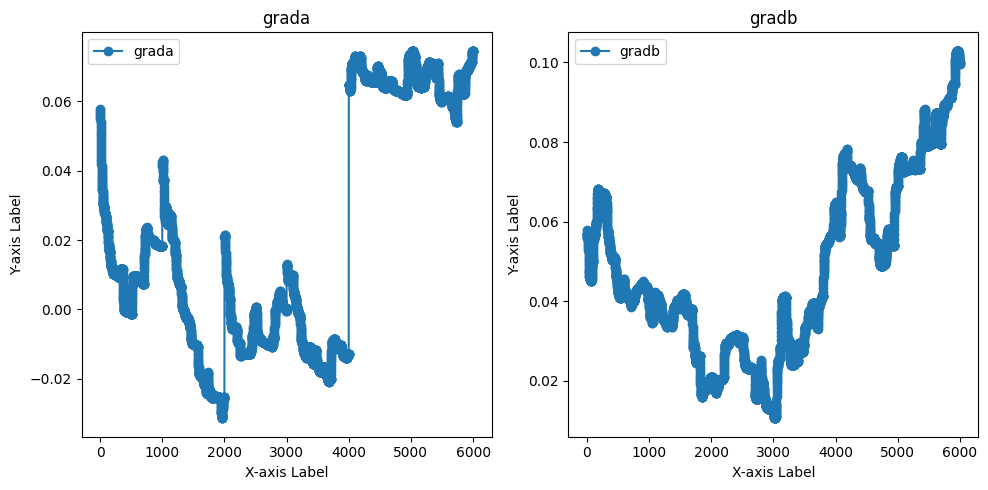

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have lists of numbers grada and gradb

# Generate x-values based on the index of each element
x_valuesa = range(len(grada))
x_valuesb = range(len(gradb))
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the data for grada on the first subplot
axs[0].plot(x_valuesa, grada, marker='o', linestyle='-', label='grada')
axs[0].set_title('grada')
axs[0].set_xlabel('X-axis Label')
axs[0].set_ylabel('Y-axis Label')
axs[0].legend()

# Plot the data for gradb on the second subplot
axs[1].plot(x_valuesb, gradb, marker='o', linestyle='-', label='gradb')
axs[1].set_title('gradb')
axs[1].set_xlabel('X-axis Label')
axs[1].set_ylabel('Y-axis Label')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


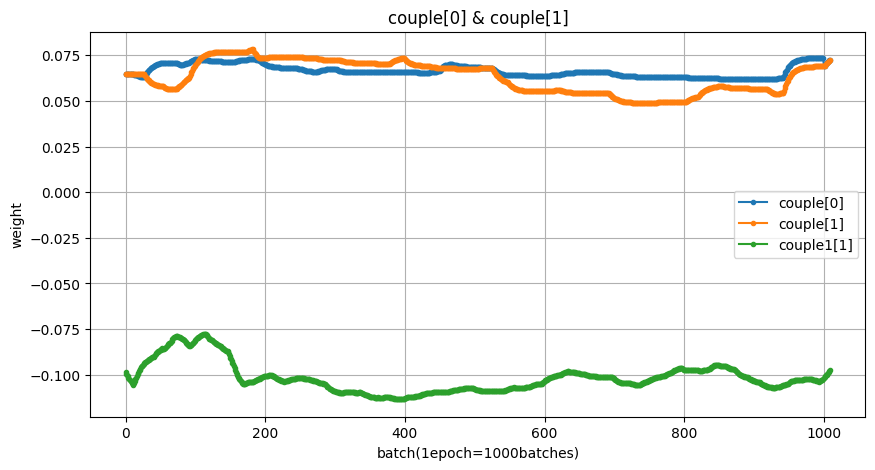

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have lists of numbers grada and gradb
a=4000
b=5010
# Generate x-values based on the index of each element
x_valuesa = range(len(grada[a:b]))
x_valuesb = range(len(gradb[a:b]))

# Create a figure
plt.figure(figsize=(10, 5))

# Plot the data for grada
plt.plot(x_valuesa, grada[a:b], marker='.', linestyle='-', label='couple[0]')

# Plot the data for gradb
plt.plot(x_valuesb, gradb[a:b], marker='.', linestyle='-', label='couple[1]')

# Plot the data for gradb
plt.plot(x_valuesb, grada1[a:b], marker='.', linestyle='-', label='couple1[1]')

# Set title and labels
plt.title('couple[0] & couple[1]')
plt.xlabel('batch(1epoch=1000batches)')
plt.ylabel('weight')
plt.grid()
# Show legend
plt.legend()

# Show the plot
plt.show()


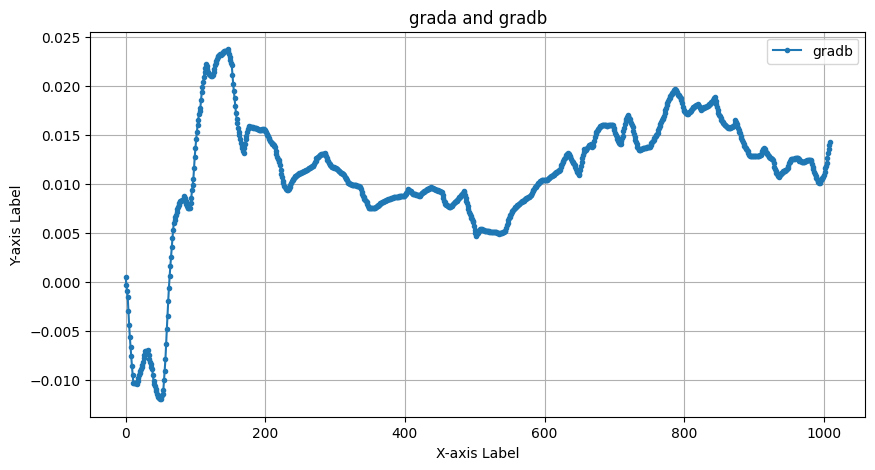

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have lists of numbers grada and gradb

# Generate x-values based on the index of each element
x_valuesa = range(len(grada))
x_valuesb = range(len(gradb[a:b]))

# Create a figure
plt.figure(figsize=(10, 5))


# Plot the data for gradb
plt.plot(x_valuesb, gradb1[a:b], marker='.', linestyle='-', label='gradb')

# Set title and labels
plt.title('grada and gradb')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.grid()
# Show legend
plt.legend()

# Show the plot
plt.show()


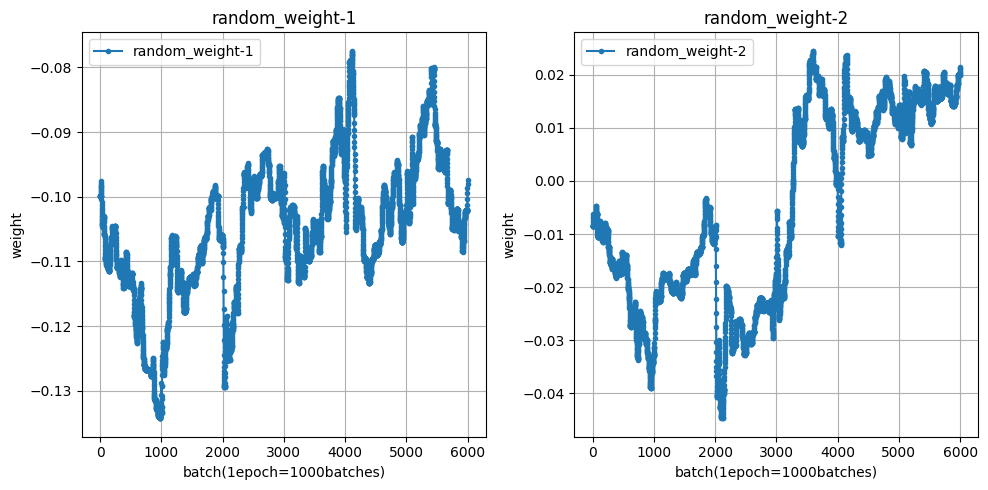

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have lists of numbers grada and gradb

# Generate x-values based on the index of each element
x_valuesa = range(len(grada1))
x_valuesb = range(len(gradb1))
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the data for grada on the first subplot
axs[0].plot(x_valuesa, grada1, marker='.', linestyle='-', label='random_weight-1')
axs[0].set_title('random_weight-1')
axs[0].set_xlabel('batch(1epoch=1000batches)')
axs[0].set_ylabel('weight')
axs[0].grid()  # Add grid
axs[0].legend()

# Plot the data for gradb on the second subplot
axs[1].plot(x_valuesb, gradb1, marker='.', linestyle='-', label='random_weight-2')
axs[1].set_title('random_weight-2')
axs[1].set_xlabel('batch(1epoch=1000batches)')
axs[1].set_ylabel('weight')
axs[1].grid()  # Add grid
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


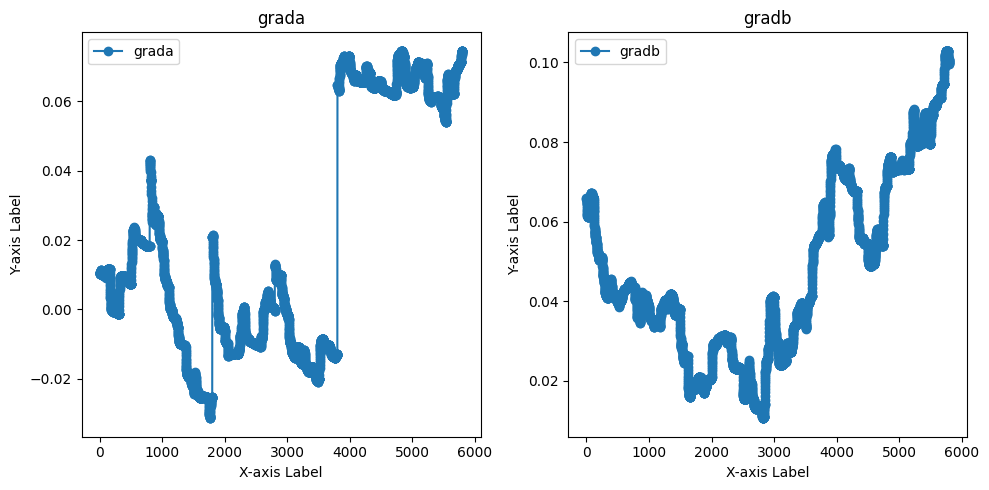

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have lists of numbers grada and gradb

# Generate x-values based on the index of each element
x_valuesa = range(len(grada[200:]))
x_valuesb = range(len(gradb[200:]))
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the data for grada on the first subplot
axs[0].plot(x_valuesa, grada[200:], marker='o', linestyle='-', label='grada')
axs[0].set_title('grada')
axs[0].set_xlabel('X-axis Label')
axs[0].set_ylabel('Y-axis Label')
axs[0].legend()

# Plot the data for gradb on the second subplot
axs[1].plot(x_valuesb, gradb[200:], marker='o', linestyle='-', label='gradb')
axs[1].set_title('gradb')
axs[1].set_xlabel('X-axis Label')
axs[1].set_ylabel('Y-axis Label')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


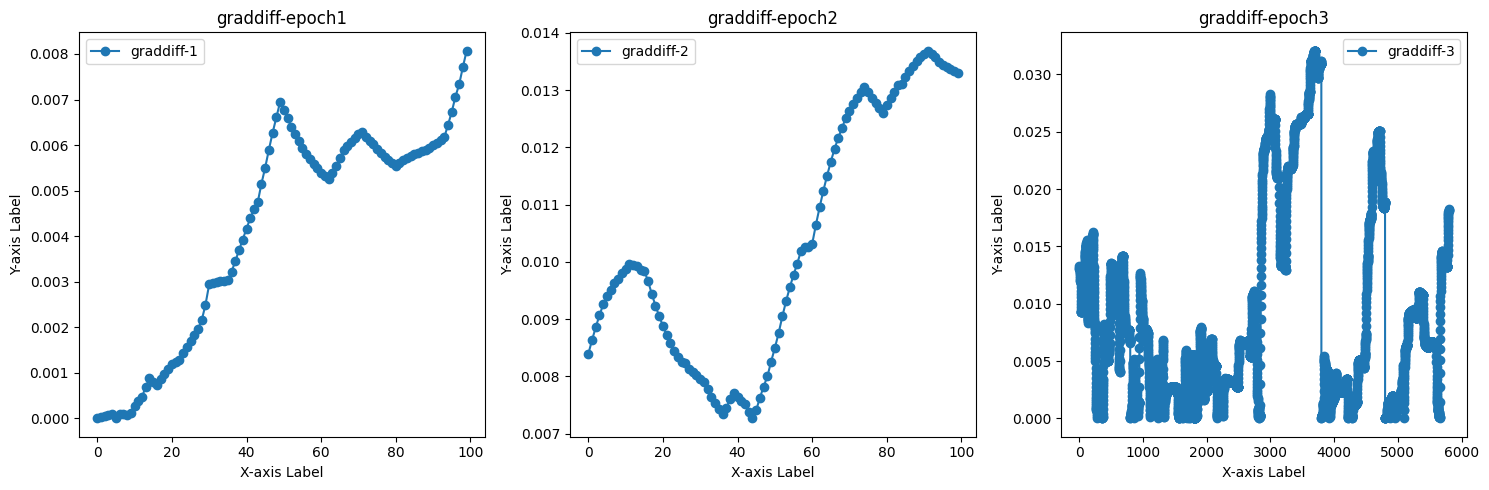

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have lists of numbers grada and gradb

# Generate x-values based on the index of each element
x_valuesa = range(len(graddiff[0:100]))
x_valuesb = range(len(graddiff[200:]))
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the data for grada on the first subplot
axs[0].plot(x_valuesa, graddiff[0:100], marker='o', linestyle='-', label='graddiff-1')
axs[0].set_title('graddiff-epoch1')
axs[0].set_xlabel('X-axis Label')
axs[0].set_ylabel('Y-axis Label')
axs[0].legend()

# Plot the data for gradb on the second subplot
axs[1].plot(x_valuesa, graddiff[100:200], marker='o', linestyle='-', label='graddiff-2')
axs[1].set_title('graddiff-epoch2')
axs[1].set_xlabel('X-axis Label')
axs[1].set_ylabel('Y-axis Label')
axs[1].legend()

# Plot the data for gradb on the second subplot
axs[2].plot(x_valuesb, graddiff[200:], marker='o', linestyle='-', label='graddiff-3')
axs[2].set_title('graddiff-epoch3')
axs[2].set_xlabel('X-axis Label')
axs[2].set_ylabel('Y-axis Label')
axs[2].legend()
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
print(graddiff)

[0.069026306, 0.06704696, 0.06628714, 0.06648358, 0.0670735, 0.068693414, 0.07003264, 0.070162766, 0.07141145, 0.07218765, 0.0728784, 0.07403705, 0.07526149, 0.07181251, 0.07053358, 0.07021749, 0.06868963, 0.068493284, 0.06951679, 0.07099668, 0.07054367, 0.070759274, 0.07130042, 0.07436084, 0.0717951, 0.070525035, 0.07025372, 0.073356025, 0.07710135, 0.07787758, 0.07756073, 0.07666433, 0.07502394, 0.07464263, 0.073100336, 0.07795552, 0.07792418, 0.07760329, 0.077924155, 0.07915736, 0.080920175, 0.08312758, 0.08045428, 0.0802674, 0.07621797, 0.07574877, 0.07376439, 0.077322975, 0.08067515, 0.07995266, 0.07837302, 0.076900065, 0.07250345, 0.07011431, 0.071687534, 0.06934306, 0.066504695, 0.0656405, 0.06364541, 0.06765209, 0.068454504, 0.06717863, 0.06813025, 0.06913964, 0.0698525, 0.0681073, 0.06931896, 0.07264152, 0.069287784, 0.073142804, 0.077439055, 0.079154074, 0.07812375, 0.07702901, 0.07203857, 0.069216885, 0.06702312, 0.062132124, 0.061662428, 0.0624718, 0.061775096, 0.06620355, 

In [ ]:
for jjj in range(ran):
    for ee in range(third_layer):
        #print(i,j)
        weights[2][jjj][ee]=0
        weights[3][ee]=0
model.set_weights(weights)
model.set_weights(weights)
weights = model.get_weights()
print(len(weights[2][101]))

100


In [ ]:
print(weights[4])

[[-4.01174575e-01  2.65997071e-02 -5.18641323e-02  1.51232883e-01
   6.05373532e-02 -2.06962854e-01 -3.37179124e-01  9.25764292e-02
   4.70110998e-02 -2.08038166e-01]
 [ 5.06605394e-03 -1.50534093e-01 -8.18422362e-02 -2.55277961e-01
   6.35122284e-02 -3.49446684e-02  1.66231513e-01 -3.85206979e-04
  -3.27786058e-01  3.53188142e-02]
 [ 2.57679969e-01  1.35220960e-01  3.22251111e-01 -1.55001760e-01
  -1.90234601e-01 -3.18504632e-01  9.01109353e-02  1.91527948e-01
   2.34597087e-01 -4.21393842e-01]
 [ 7.95968026e-02 -3.64000909e-02 -1.29054353e-01 -1.24649346e-01
   1.55901447e-01 -1.28353581e-01  9.58560407e-02 -4.21101749e-02
   2.19773740e-01  1.25172690e-01]
 [-4.59532905e-03 -3.38620171e-02 -2.16779917e-01 -1.90718740e-01
  -2.19367430e-01 -1.60971195e-01 -2.10441977e-01 -2.14877166e-02
  -8.87539536e-02 -5.02291620e-02]
 [ 5.85993789e-02 -3.58884521e-02  3.66685808e-01  1.77555293e-01
  -1.59563199e-01 -2.16520742e-01 -3.43228638e-01  4.51868996e-02
  -1.25355527e-01 -1.19352303e-01

In [ ]:
weights = model.get_weights()
for j in range(ran):
  for i in range(third_layer):
    if(j>0):
      weights[2][j][i]=0
      #weights[3][j]=0
model.set_weights(weights)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 2.3136 - accuracy: 0.1134
Test accuracy: 0.11339999735355377


In [ ]:
print(len(weights[2][150]))

IndexError: index 150 is out of bounds for axis 0 with size 100

In [ ]:
weights = model.get_weights()
print((weights[0][0]))
print((weights[0][1]))
print((weights[0][298]))
print((weights[0][782]))

[ 0.07535802  0.07535802 -0.00597346 -0.00597346 -0.0729687  -0.0729687
 -0.00768563 -0.00768563  0.07864842  0.07864842  0.01369406  0.01369406
 -0.06001019 -0.06001019  0.07134333  0.07134333 -0.04730347 -0.04730347
 -0.02792075 -0.02792075 -0.08075488 -0.08075488  0.0387833   0.0387833
  0.05685438  0.05685438 -0.02036732 -0.02036732 -0.01213769 -0.01213769
  0.00242123  0.00242123 -0.03751222 -0.03751222  0.00829719  0.00829719
 -0.05487755 -0.05487755 -0.07516422 -0.07516422 -0.00677133 -0.00677133
 -0.00871576 -0.00871576 -0.0565907  -0.0565907   0.00631952  0.00631952
 -0.03209388 -0.03209388  0.03132966  0.03132966 -0.04431269 -0.04431269
 -0.0001386  -0.0001386   0.03644075  0.03644075  0.06239846  0.06239846
  0.02223327  0.02223327  0.06219424  0.06219424 -0.04921225 -0.04921225
  0.05307855  0.05307855 -0.02124227 -0.02124227 -0.03854463 -0.03854463
 -0.06495068 -0.06495068  0.02593906  0.02593906 -0.07197277 -0.07197277
  0.03373711  0.03373711 -0.0655504  -0.0655504   0.0

In [ ]:
import matplotlib.pyplot as plt

# Your data sets
#data1 = [
#   97.83, 97.79, 97.81, 97.58, 97.32, 96.24, 95.65, 96.35, 96.43, 96.35, 96.34,
#    96.07, 96.63, 95.99, 96.46, 95.30, 96.24, 95.31, 95.55, 96.21, 96.46, 95.85
#]

#data2 = [
#    97.83, 97.71, 97.50, 97.68, 96.42, 90.61, 85.73, 88.84, 73.00, 76.92, 50.04,
#    68.99, 45.50, 44.04, 43.30, 42.10, 37.65, 27.27, 24.56, 23.35, 11.34, 9.96
#]

# Provided x-axis values
#x_values = [0, 10, 32, 64, 128, 200, 206, 210, 216, 220, 226, 230, 236, 240, 242, 244, 246, 248, 250, 252, 254, 256]
data1=act
data2=react
x_values=te

# Plot the data against x_values
plt.figure(figsize=(8, 6))  # Adjust figure size for better presentation
plt.plot(x_values, data1, marker='o', linestyle='-', label='Actual Accuracy')
plt.plot(x_values, data2, marker='o', linestyle='-', label='Reverse Engineered Accuracy')

# Add labels and title with appropriate font sizes
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Comparison of Actual Accuracy and Reverse Engineered Accuracy', fontsize=14)

# Add legend with appropriate font size
plt.legend(fontsize=10)

# Customize ticks and grid for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('accuracy_comparison.png', dpi=300)  # Save the plot as an image
plt.show()


NameError: name 'act' is not defined